In [1]:
import xgboost as xgb
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

C:\Programs\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
X_with_columns = pd.read_pickle("pickle_files/X.pkl")
Z_with_columns = pd.read_pickle("pickle_files/Z.pkl")

columns_to_drop = []

X_with_columns.drop(columns_to_drop, axis = 1, inplace=True)
Z_with_columns.drop(columns_to_drop, axis = 1, inplace=True)

X = np.array(X_with_columns)
Y = np.array(pd.read_pickle("pickle_files/Y.pkl"))
Z = np.array(Z_with_columns)
df_next_games = pd.read_pickle("pickle_files/next_games.pkl")

In [3]:
kf = KFold(n_splits=4, random_state=0, shuffle=True)
kf.get_n_splits(X)

4

In [4]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

TRAIN: [  0   3   4   6   7   9  11  13  15  16  17  19  20  21  22  23  24  25
  26  28  29  30  32  33  35  36  38  41  42  43  44  45  46  47  51  53
  54  56  57  58  59  60  61  62  63  65  66  67  69  70  72  73  74  78
  80  81  82  83  84  86  87  88  89  90  91  92  93  94  95  96  98  99
 100 102 104 105 106 107 108 109 110 111 112 114 115 117 119 120 121 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 143
 144 146 147 148 149 151 152 153 154 155 158 159 160 161 163 164 165 166
 167 168 169 170 171 173 174 176 177 178 179 180 182 183 184 185 186 187
 188 189 190 191 192 194 195 197 198 199 201 203 205 206 207 208 209 211
 212 213 214 216 217 218 219 220 221 223 224 225 226 227 228 229 232 233
 234 237 238 243 244 245 246 247 248 250 254 256 257 259 260 262 264 265
 268 269 273 274 275 276 277 280 281 282 284 286 287 288 289 290 291 292
 295 296 297 298 300 301 302 303 304 305 307 309 311 312 313 314 315 318
 320 321 322 323 324 325 326 327 328 329 330

## XGBoost

In [5]:
XGB_model = xgb.XGBClassifier(silent=False, 
                      learning_rate=0.005,  
                      colsample_bytree = 0.5,
                      subsample = 0.8,
                      objective='multi:softprob', 
                      n_estimators=1000, 
                      reg_alpha = 60,
                      reg_lambda = .5,
                      max_depth=4, 
                      max_delta_step=3,
                      gamma=5,
                      seed=82)

# add max_delta_step=3  to handle imbalanced class with draws
# max depth was 5. I changed to 4.

In [6]:
eval_set = [(X_train, y_train), (X_test, y_test)]

XGB_model.fit(X_train, y_train, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=True)
y_pred = XGB_model.predict(X_test)
y_pred_train = XGB_model.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)

[16:57:39] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-merror:0.08374	validation_0-mlogloss:1.09598	validation_1-merror:0.08696	validation_1-mlogloss:1.09601
[1]	validation_0-merror:0.08374	validation_0-mlogloss:1.09343	validation_1-merror:0.08696	validation_1-mlogloss:1.09352
[2]	validation_0-merror:0.08374	validation_0-mlogloss:1.08991	validation_1-merror:0.08696	validation_1-mlogloss:1.09004
[3]	validation_0-merror:0.08374	validation_0-mlogloss:1.08728	validation_1-merror:0.08696	validation_1-mlogloss:1.08748
[4]	validation_0-merror:0.08374	validation_0-mlogloss:1.08477	validation_1-merror:0.08696	validation_1-mlogloss:1.08502
[5]	validation_0-merror:0.08374	validation_

[65]	validation_0-merror:0.08374	validation_0-mlogloss:0.92609	validation_1-merror:0.08696	validation_1-mlogloss:0.92891
[66]	validation_0-merror:0.08374	validation_0-mlogloss:0.92370	validation_1-merror:0.08696	validation_1-mlogloss:0.92654
[67]	validation_0-merror:0.08374	validation_0-mlogloss:0.92127	validation_1-merror:0.08696	validation_1-mlogloss:0.92414
[68]	validation_0-merror:0.08374	validation_0-mlogloss:0.91888	validation_1-merror:0.08696	validation_1-mlogloss:0.92176
[69]	validation_0-merror:0.08374	validation_0-mlogloss:0.91650	validation_1-merror:0.08696	validation_1-mlogloss:0.91941
[70]	validation_0-merror:0.08374	validation_0-mlogloss:0.91407	validation_1-merror:0.08696	validation_1-mlogloss:0.91700
[71]	validation_0-merror:0.08374	validation_0-mlogloss:0.91175	validation_1-merror:0.08696	validation_1-mlogloss:0.91471
[72]	validation_0-merror:0.08374	validation_0-mlogloss:0.90999	validation_1-merror:0.08696	validation_1-mlogloss:0.91297
[73]	validation_0-merror:0.08374

[133]	validation_0-merror:0.08374	validation_0-mlogloss:0.80285	validation_1-merror:0.08696	validation_1-mlogloss:0.80750
[134]	validation_0-merror:0.08374	validation_0-mlogloss:0.80114	validation_1-merror:0.08696	validation_1-mlogloss:0.80580
[135]	validation_0-merror:0.08374	validation_0-mlogloss:0.79939	validation_1-merror:0.08696	validation_1-mlogloss:0.80405
[136]	validation_0-merror:0.08374	validation_0-mlogloss:0.79818	validation_1-merror:0.08696	validation_1-mlogloss:0.80287
[137]	validation_0-merror:0.08374	validation_0-mlogloss:0.79644	validation_1-merror:0.08696	validation_1-mlogloss:0.80114
[138]	validation_0-merror:0.08374	validation_0-mlogloss:0.79585	validation_1-merror:0.08696	validation_1-mlogloss:0.80060
[139]	validation_0-merror:0.08374	validation_0-mlogloss:0.79416	validation_1-merror:0.08696	validation_1-mlogloss:0.79892
[140]	validation_0-merror:0.08374	validation_0-mlogloss:0.79297	validation_1-merror:0.08696	validation_1-mlogloss:0.79773
[141]	validation_0-merro

[201]	validation_0-merror:0.08374	validation_0-mlogloss:0.71900	validation_1-merror:0.08696	validation_1-mlogloss:0.72479
[202]	validation_0-merror:0.08374	validation_0-mlogloss:0.71812	validation_1-merror:0.08696	validation_1-mlogloss:0.72393
[203]	validation_0-merror:0.08374	validation_0-mlogloss:0.71688	validation_1-merror:0.08696	validation_1-mlogloss:0.72269
[204]	validation_0-merror:0.08374	validation_0-mlogloss:0.71559	validation_1-merror:0.08696	validation_1-mlogloss:0.72141
[205]	validation_0-merror:0.08374	validation_0-mlogloss:0.71430	validation_1-merror:0.08696	validation_1-mlogloss:0.72012
[206]	validation_0-merror:0.08374	validation_0-mlogloss:0.71303	validation_1-merror:0.08696	validation_1-mlogloss:0.71886
[207]	validation_0-merror:0.08374	validation_0-mlogloss:0.71181	validation_1-merror:0.08696	validation_1-mlogloss:0.71764
[208]	validation_0-merror:0.08374	validation_0-mlogloss:0.71094	validation_1-merror:0.08696	validation_1-mlogloss:0.71681
[209]	validation_0-merro

[269]	validation_0-merror:0.08374	validation_0-mlogloss:0.65521	validation_1-merror:0.08696	validation_1-mlogloss:0.66171
[270]	validation_0-merror:0.08374	validation_0-mlogloss:0.65455	validation_1-merror:0.08696	validation_1-mlogloss:0.66107
[271]	validation_0-merror:0.08374	validation_0-mlogloss:0.65390	validation_1-merror:0.08696	validation_1-mlogloss:0.66042
[272]	validation_0-merror:0.08374	validation_0-mlogloss:0.65299	validation_1-merror:0.08696	validation_1-mlogloss:0.65952
[273]	validation_0-merror:0.08374	validation_0-mlogloss:0.65206	validation_1-merror:0.08696	validation_1-mlogloss:0.65860
[274]	validation_0-merror:0.08374	validation_0-mlogloss:0.65114	validation_1-merror:0.08696	validation_1-mlogloss:0.65767
[275]	validation_0-merror:0.08374	validation_0-mlogloss:0.65020	validation_1-merror:0.08696	validation_1-mlogloss:0.65674
[276]	validation_0-merror:0.08374	validation_0-mlogloss:0.64925	validation_1-merror:0.08696	validation_1-mlogloss:0.65580
[277]	validation_0-merro

[337]	validation_0-merror:0.08374	validation_0-mlogloss:0.60813	validation_1-merror:0.08696	validation_1-mlogloss:0.61508
[338]	validation_0-merror:0.08374	validation_0-mlogloss:0.60745	validation_1-merror:0.08696	validation_1-mlogloss:0.61440
[339]	validation_0-merror:0.08374	validation_0-mlogloss:0.60706	validation_1-merror:0.08696	validation_1-mlogloss:0.61404
[340]	validation_0-merror:0.08374	validation_0-mlogloss:0.60670	validation_1-merror:0.08696	validation_1-mlogloss:0.61370
[341]	validation_0-merror:0.08374	validation_0-mlogloss:0.60597	validation_1-merror:0.08696	validation_1-mlogloss:0.61297
[342]	validation_0-merror:0.08374	validation_0-mlogloss:0.60522	validation_1-merror:0.08696	validation_1-mlogloss:0.61223
[343]	validation_0-merror:0.08374	validation_0-mlogloss:0.60479	validation_1-merror:0.08696	validation_1-mlogloss:0.61181
[344]	validation_0-merror:0.08374	validation_0-mlogloss:0.60432	validation_1-merror:0.08696	validation_1-mlogloss:0.61134
[345]	validation_0-merro

[405]	validation_0-merror:0.08374	validation_0-mlogloss:0.57423	validation_1-merror:0.08696	validation_1-mlogloss:0.58152
[406]	validation_0-merror:0.08374	validation_0-mlogloss:0.57366	validation_1-merror:0.08696	validation_1-mlogloss:0.58096
[407]	validation_0-merror:0.08374	validation_0-mlogloss:0.57302	validation_1-merror:0.08696	validation_1-mlogloss:0.58032
[408]	validation_0-merror:0.08374	validation_0-mlogloss:0.57242	validation_1-merror:0.08696	validation_1-mlogloss:0.57972
[409]	validation_0-merror:0.08374	validation_0-mlogloss:0.57210	validation_1-merror:0.08696	validation_1-mlogloss:0.57942
[410]	validation_0-merror:0.08374	validation_0-mlogloss:0.57155	validation_1-merror:0.08696	validation_1-mlogloss:0.57886
[411]	validation_0-merror:0.08374	validation_0-mlogloss:0.57095	validation_1-merror:0.08696	validation_1-mlogloss:0.57826
[412]	validation_0-merror:0.08374	validation_0-mlogloss:0.57037	validation_1-merror:0.08696	validation_1-mlogloss:0.57769
[413]	validation_0-merro

[473]	validation_0-merror:0.08374	validation_0-mlogloss:0.54459	validation_1-merror:0.08696	validation_1-mlogloss:0.55197
[474]	validation_0-merror:0.08374	validation_0-mlogloss:0.54413	validation_1-merror:0.08696	validation_1-mlogloss:0.55151
[475]	validation_0-merror:0.08374	validation_0-mlogloss:0.54369	validation_1-merror:0.08696	validation_1-mlogloss:0.55107
[476]	validation_0-merror:0.08374	validation_0-mlogloss:0.54324	validation_1-merror:0.08696	validation_1-mlogloss:0.55063
[477]	validation_0-merror:0.08374	validation_0-mlogloss:0.54280	validation_1-merror:0.08696	validation_1-mlogloss:0.55019
[478]	validation_0-merror:0.08374	validation_0-mlogloss:0.54259	validation_1-merror:0.08696	validation_1-mlogloss:0.54996
[479]	validation_0-merror:0.08374	validation_0-mlogloss:0.54234	validation_1-merror:0.08696	validation_1-mlogloss:0.54972
[480]	validation_0-merror:0.08374	validation_0-mlogloss:0.54193	validation_1-merror:0.08696	validation_1-mlogloss:0.54932
[481]	validation_0-merro

[541]	validation_0-merror:0.08374	validation_0-mlogloss:0.52195	validation_1-merror:0.08696	validation_1-mlogloss:0.52946
[542]	validation_0-merror:0.08374	validation_0-mlogloss:0.52157	validation_1-merror:0.08696	validation_1-mlogloss:0.52908
[543]	validation_0-merror:0.08374	validation_0-mlogloss:0.52140	validation_1-merror:0.08696	validation_1-mlogloss:0.52889
[544]	validation_0-merror:0.08374	validation_0-mlogloss:0.52099	validation_1-merror:0.08696	validation_1-mlogloss:0.52848
[545]	validation_0-merror:0.08374	validation_0-mlogloss:0.52079	validation_1-merror:0.08696	validation_1-mlogloss:0.52826
[546]	validation_0-merror:0.08374	validation_0-mlogloss:0.52042	validation_1-merror:0.08696	validation_1-mlogloss:0.52789
[547]	validation_0-merror:0.08374	validation_0-mlogloss:0.52042	validation_1-merror:0.08696	validation_1-mlogloss:0.52789
[548]	validation_0-merror:0.08374	validation_0-mlogloss:0.52003	validation_1-merror:0.08696	validation_1-mlogloss:0.52751
[549]	validation_0-merro

[609]	validation_0-merror:0.08374	validation_0-mlogloss:0.50335	validation_1-merror:0.08696	validation_1-mlogloss:0.51075
[610]	validation_0-merror:0.08374	validation_0-mlogloss:0.50300	validation_1-merror:0.08696	validation_1-mlogloss:0.51040
[611]	validation_0-merror:0.08374	validation_0-mlogloss:0.50266	validation_1-merror:0.08696	validation_1-mlogloss:0.51007
[612]	validation_0-merror:0.08374	validation_0-mlogloss:0.50236	validation_1-merror:0.08696	validation_1-mlogloss:0.50977
[613]	validation_0-merror:0.08374	validation_0-mlogloss:0.50222	validation_1-merror:0.08696	validation_1-mlogloss:0.50961
[614]	validation_0-merror:0.08374	validation_0-mlogloss:0.50209	validation_1-merror:0.08696	validation_1-mlogloss:0.50947
[615]	validation_0-merror:0.08374	validation_0-mlogloss:0.50174	validation_1-merror:0.08696	validation_1-mlogloss:0.50912
[616]	validation_0-merror:0.08374	validation_0-mlogloss:0.50143	validation_1-merror:0.08696	validation_1-mlogloss:0.50882
[617]	validation_0-merro

[677]	validation_0-merror:0.08374	validation_0-mlogloss:0.48758	validation_1-merror:0.08696	validation_1-mlogloss:0.49499
[678]	validation_0-merror:0.08374	validation_0-mlogloss:0.48740	validation_1-merror:0.08696	validation_1-mlogloss:0.49482
[679]	validation_0-merror:0.08374	validation_0-mlogloss:0.48723	validation_1-merror:0.08696	validation_1-mlogloss:0.49467
[680]	validation_0-merror:0.08374	validation_0-mlogloss:0.48710	validation_1-merror:0.08696	validation_1-mlogloss:0.49454
[681]	validation_0-merror:0.08374	validation_0-mlogloss:0.48681	validation_1-merror:0.08696	validation_1-mlogloss:0.49425
[682]	validation_0-merror:0.08374	validation_0-mlogloss:0.48650	validation_1-merror:0.08696	validation_1-mlogloss:0.49394
[683]	validation_0-merror:0.08374	validation_0-mlogloss:0.48622	validation_1-merror:0.08696	validation_1-mlogloss:0.49366
[684]	validation_0-merror:0.08374	validation_0-mlogloss:0.48591	validation_1-merror:0.08696	validation_1-mlogloss:0.49335
[685]	validation_0-merro

[745]	validation_0-merror:0.08374	validation_0-mlogloss:0.47290	validation_1-merror:0.08696	validation_1-mlogloss:0.48031
[746]	validation_0-merror:0.08374	validation_0-mlogloss:0.47276	validation_1-merror:0.08696	validation_1-mlogloss:0.48018
[747]	validation_0-merror:0.08374	validation_0-mlogloss:0.47254	validation_1-merror:0.08696	validation_1-mlogloss:0.47996
[748]	validation_0-merror:0.08374	validation_0-mlogloss:0.47229	validation_1-merror:0.08696	validation_1-mlogloss:0.47971
[749]	validation_0-merror:0.08374	validation_0-mlogloss:0.47205	validation_1-merror:0.08696	validation_1-mlogloss:0.47947
[750]	validation_0-merror:0.08374	validation_0-mlogloss:0.47182	validation_1-merror:0.08696	validation_1-mlogloss:0.47924
[751]	validation_0-merror:0.08374	validation_0-mlogloss:0.47156	validation_1-merror:0.08696	validation_1-mlogloss:0.47899
[752]	validation_0-merror:0.08374	validation_0-mlogloss:0.47131	validation_1-merror:0.08696	validation_1-mlogloss:0.47873
[753]	validation_0-merro

[813]	validation_0-merror:0.08374	validation_0-mlogloss:0.46009	validation_1-merror:0.08696	validation_1-mlogloss:0.46753
[814]	validation_0-merror:0.08374	validation_0-mlogloss:0.46000	validation_1-merror:0.08696	validation_1-mlogloss:0.46744
[815]	validation_0-merror:0.08374	validation_0-mlogloss:0.45980	validation_1-merror:0.08696	validation_1-mlogloss:0.46723
[816]	validation_0-merror:0.08374	validation_0-mlogloss:0.45961	validation_1-merror:0.08696	validation_1-mlogloss:0.46705
[817]	validation_0-merror:0.08374	validation_0-mlogloss:0.45940	validation_1-merror:0.08696	validation_1-mlogloss:0.46684
[818]	validation_0-merror:0.08374	validation_0-mlogloss:0.45922	validation_1-merror:0.08696	validation_1-mlogloss:0.46665
[819]	validation_0-merror:0.08374	validation_0-mlogloss:0.45914	validation_1-merror:0.08696	validation_1-mlogloss:0.46658
[820]	validation_0-merror:0.08374	validation_0-mlogloss:0.45897	validation_1-merror:0.08696	validation_1-mlogloss:0.46640
[821]	validation_0-merro

[881]	validation_0-merror:0.08374	validation_0-mlogloss:0.44989	validation_1-merror:0.08696	validation_1-mlogloss:0.45731
[882]	validation_0-merror:0.08374	validation_0-mlogloss:0.44983	validation_1-merror:0.08696	validation_1-mlogloss:0.45725
[883]	validation_0-merror:0.08374	validation_0-mlogloss:0.44965	validation_1-merror:0.08696	validation_1-mlogloss:0.45707
[884]	validation_0-merror:0.08374	validation_0-mlogloss:0.44949	validation_1-merror:0.08696	validation_1-mlogloss:0.45691
[885]	validation_0-merror:0.08374	validation_0-mlogloss:0.44940	validation_1-merror:0.08696	validation_1-mlogloss:0.45681
[886]	validation_0-merror:0.08374	validation_0-mlogloss:0.44931	validation_1-merror:0.08696	validation_1-mlogloss:0.45671
[887]	validation_0-merror:0.08374	validation_0-mlogloss:0.44924	validation_1-merror:0.08696	validation_1-mlogloss:0.45663
[888]	validation_0-merror:0.08374	validation_0-mlogloss:0.44907	validation_1-merror:0.08696	validation_1-mlogloss:0.45646
[889]	validation_0-merro

[949]	validation_0-merror:0.08374	validation_0-mlogloss:0.44084	validation_1-merror:0.08696	validation_1-mlogloss:0.44827
[950]	validation_0-merror:0.08374	validation_0-mlogloss:0.44078	validation_1-merror:0.08696	validation_1-mlogloss:0.44820
[951]	validation_0-merror:0.08374	validation_0-mlogloss:0.44060	validation_1-merror:0.08696	validation_1-mlogloss:0.44802
[952]	validation_0-merror:0.08374	validation_0-mlogloss:0.44046	validation_1-merror:0.08696	validation_1-mlogloss:0.44788
[953]	validation_0-merror:0.08374	validation_0-mlogloss:0.44040	validation_1-merror:0.08696	validation_1-mlogloss:0.44782
[954]	validation_0-merror:0.08374	validation_0-mlogloss:0.44028	validation_1-merror:0.08696	validation_1-mlogloss:0.44770
[955]	validation_0-merror:0.08374	validation_0-mlogloss:0.44015	validation_1-merror:0.08696	validation_1-mlogloss:0.44757
[956]	validation_0-merror:0.08374	validation_0-mlogloss:0.43999	validation_1-merror:0.08696	validation_1-mlogloss:0.44741
[957]	validation_0-merro

In [7]:
y_pred.shape

(207,)

In [8]:
pd.Series(y_pred).value_counts()

3.0    118
1.0     89
dtype: int64

## LogisticRegression

In [9]:
LR = LogisticRegression(random_state = 42)
LR.fit(X_train, y_train)
LR_y_pred = LR.predict(X_test)
LR_y_pred_train = LR.predict(X_train)
LR_accuracy = accuracy_score(y_test, LR_y_pred)
LR_accuracy_train = accuracy_score(y_train, LR_y_pred_train)

In [10]:
pd.Series(LR_y_pred).value_counts()

3.0    110
1.0     97
dtype: int64

## Comparison

In [11]:
print("XGB train Accuracy: %.2f%%" % (accuracy_train * 100.0))
print("XGB Accuracy: %.2f%%" % (accuracy * 100.0))
print("LR train Accuracy: %.2f%%" % (LR_accuracy_train * 100.0))
print("LR Accuracy: %.2f%%" % (LR_accuracy * 100.0))

XGB train Accuracy: 91.63%
XGB Accuracy: 91.30%
LR train Accuracy: 89.53%
LR Accuracy: 87.44%


In [12]:
features_names = list(X_with_columns.columns)

In [13]:
importance = np.round(XGB_model.feature_importances_,4)
dictionary = dict(zip(features_names, importance))
sorted_dictionary=sorted(dictionary.items(), key=lambda x:x[1], reverse=True)
names=[]
values=[]
for i in range(0, len(importance)):
    print('Feature Importance: {:35} {}%'.format(
        sorted_dictionary[i][0], np.round(sorted_dictionary[i][1]*100,4))
         )
    names.append(sorted_dictionary[i][0])
    values.append(np.round(sorted_dictionary[i][1]*100,4))

Feature Importance: ATGDIFF                             25.05%
Feature Importance: HTGDIFF                             24.93%
Feature Importance: awayTeamScore.minutesInFront        14.61%
Feature Importance: homeTeamScore.minutesInFront        13.29%
Feature Importance: homeTeamScore.matchScore.totalScore 5.95%
Feature Importance: awayTeamScoreChart.goals            5.7%
Feature Importance: homeTeamScoreChart.goals            5.47%
Feature Importance: awayTeamScore.matchScore.totalScore 5.0%
Feature Importance: AVGHTGDIFF                          0.0%
Feature Importance: round.year                          0.0%


In [14]:
cum_values = np.cumsum(values)
values_over_95 = (cum_values > 95).sum()
columns_over_95 = names[-values_over_95:]
columns_over_95

['awayTeamScore.matchScore.totalScore', 'AVGHTGDIFF', 'round.year']

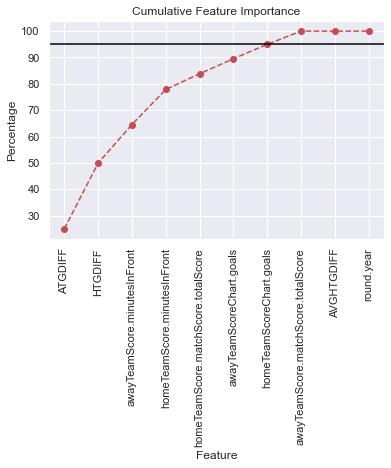

In [15]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#bottom, top = ylim()
bottom = 0
plt.plot(names,cum_values, '--bo', color='r')
# set importance at 95%
plt.axhline(95,color='black')
plt.xticks(rotation=90);
plt.xlabel('Feature'); 
plt.ylabel('Percentage'); 
plt.title('Cumulative Feature Importance');

In [16]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes, labels,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    classes=classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    #plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             #rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


<AxesSubplot:title={'center':'Confusion matrix, with normalization'}, xlabel='Predicted label', ylabel='True label'>

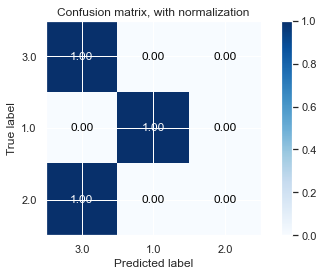

In [17]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=pd.Series(Y).unique(), labels=pd.Series(Y).unique(),
                      title='Confusion matrix, with normalization', normalize=True)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def learning_curve(preds,y_test, model):
    predictions = [round(value) for value in preds]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    # retrieve performance metrics
    results = model.evals_result()
    epochs = len(results['validation_0']['merror'])
    x_axis = range(0, epochs)
    # plot log loss
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss')
    plt.show()
    # plot classification error
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Classification Error')
    plt.title('XGBoost Classification Error')
    plt.show()

Accuracy: 91.30%


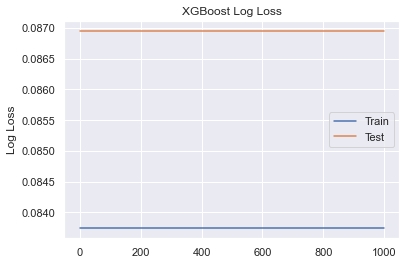

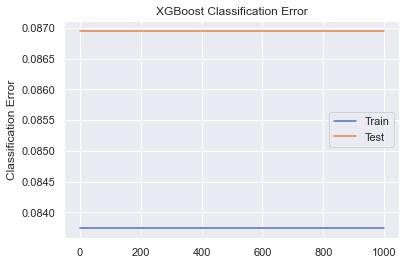

In [19]:
learning_curve(y_pred,y_test,XGB_model)

## Predict Result for Next Games

In [20]:
z_pred = XGB_model.predict(Z)

In [21]:
xgb_df_next_games = df_next_games.copy()

In [22]:
xgb_df_next_games['predicted_result'] = z_pred

In [23]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result
45,GWS Giants,St Kilda,3.0
46,Western Bulldogs,Adelaide Crows,3.0
47,Port Adelaide,West Coast Eagles,3.0
48,Fremantle,Carlton,1.0
49,North Melbourne,Geelong Cats,1.0
50,Gold Coast Suns,Brisbane Lions,1.0
51,Richmond,Melbourne,3.0
52,Hawthorn,Sydney Swans,1.0
53,Essendon,Collingwood,3.0


In [24]:
 z_pred_prob = XGB_model.predict_proba(Z)

In [25]:
xgb_df_next_games['prob_loss'] = z_pred_prob[:,0]
xgb_df_next_games['prob_draw'] = z_pred_prob[:,1]
xgb_df_next_games['prob_win'] = z_pred_prob[:,2]




In [26]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result,prob_loss,prob_draw,prob_win
45,GWS Giants,St Kilda,3.0,0.152003,0.149484,0.698513
46,Western Bulldogs,Adelaide Crows,3.0,0.152003,0.149484,0.698513
47,Port Adelaide,West Coast Eagles,3.0,0.152003,0.149484,0.698513
48,Fremantle,Carlton,1.0,0.452304,0.193776,0.353920
49,North Melbourne,Geelong Cats,1.0,0.645507,0.166548,0.187944
50,Gold Coast Suns,Brisbane Lions,1.0,0.645507,0.166548,0.187944
51,Richmond,Melbourne,3.0,0.152003,0.149484,0.698513
52,Hawthorn,Sydney Swans,1.0,0.645507,0.166548,0.187944
53,Essendon,Collingwood,3.0,0.152003,0.149484,0.698513


In [27]:

xgb_df_next_games['home_prob_win'] = 0.0

for i in range(len(xgb_df_next_games)):
    if xgb_df_next_games['predicted_result'].values[i] == 3.0:
        xgb_df_next_games['home_prob_win'].values[i] = xgb_df_next_games['prob_win'].values[i]
    elif xgb_df_next_games['predicted_result'].values[i] == 2.0:
        xgb_df_next_games['home_prob_win'].values[i] = 0.5
    elif xgb_df_next_games['predicted_result'].values[i] == 1.0:
        xgb_df_next_games['home_prob_win'].values[i] = 1.0 - xgb_df_next_games['prob_loss'].values[i]

In [28]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result,prob_loss,prob_draw,prob_win,home_prob_win
45,GWS Giants,St Kilda,3.0,0.152003,0.149484,0.698513,0.698513
46,Western Bulldogs,Adelaide Crows,3.0,0.152003,0.149484,0.698513,0.698513
47,Port Adelaide,West Coast Eagles,3.0,0.152003,0.149484,0.698513,0.698513
48,Fremantle,Carlton,1.0,0.452304,0.193776,0.353920,0.547696
49,North Melbourne,Geelong Cats,1.0,0.645507,0.166548,0.187944,0.354493
50,Gold Coast Suns,Brisbane Lions,1.0,0.645507,0.166548,0.187944,0.354493
51,Richmond,Melbourne,3.0,0.152003,0.149484,0.698513,0.698513
52,Hawthorn,Sydney Swans,1.0,0.645507,0.166548,0.187944,0.354493
53,Essendon,Collingwood,3.0,0.152003,0.149484,0.698513,0.698513
